In [228]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, pearsonr, linregress

In [229]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def r2(x, y):
    return pearsonr(x, y)[0] ** 2

In [230]:
df = pd.read_json("../stats.json")

In [231]:
df.columns

Index(['r_nuc', 'r_type', 'pairs', 'm_sequence', 'm_token', 'r_loc_pos',
       'slope', 'intercept', 'r2', 'p_val ', 'ks_stat', 'ks_p_val', 'count',
       'r_pos_min', 'r_pos_max', 'r_data_min', 'r_data_max', 'r_data',
       'r_pos'],
      dtype='object')

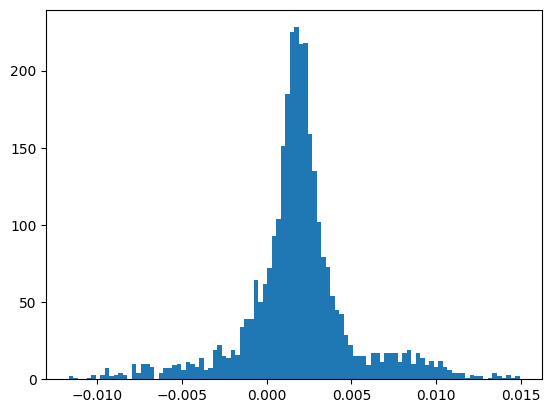

In [232]:
plt.hist(df['slope'], bins=100);

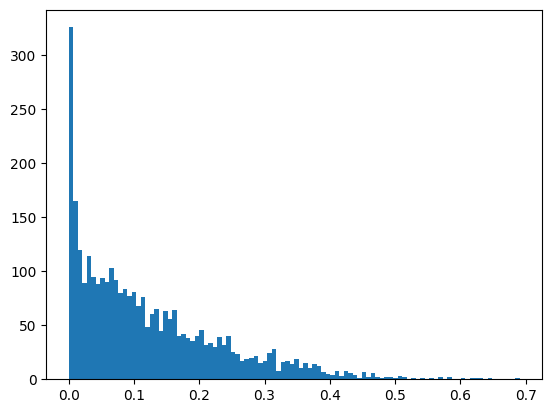

In [233]:
plt.hist(df['r2'], bins=100);

In [234]:
df.columns

Index(['r_nuc', 'r_type', 'pairs', 'm_sequence', 'm_token', 'r_loc_pos',
       'slope', 'intercept', 'r2', 'p_val ', 'ks_stat', 'ks_p_val', 'count',
       'r_pos_min', 'r_pos_max', 'r_data_min', 'r_data_max', 'r_data',
       'r_pos'],
      dtype='object')

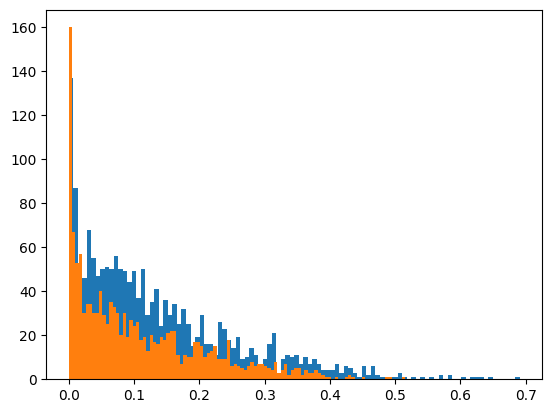

In [235]:
plt.hist(df.query("r_type == 'NON-WC'")["r2"], bins=100);
plt.hist(df.query("r_type != 'NON-WC'")["r2"], bins=100);

In [236]:
df['r2'].mean()

0.12259604661050272

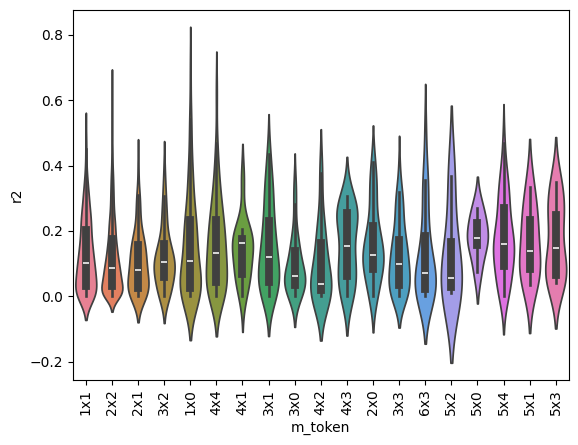

In [237]:
sns.violinplot(x='m_token', y='r2', data=df, hue='m_token');
plt.xticks(rotation=90);

In [243]:
df.columns

Index(['r_nuc', 'r_type', 'pairs', 'm_sequence', 'm_token', 'r_loc_pos',
       'slope', 'intercept', 'r2', 'p_val ', 'ks_stat', 'ks_p_val', 'count',
       'r_pos_min', 'r_pos_max', 'r_data_min', 'r_data_max', 'r_data', 'r_pos',
       'mean_r_pos', 'std_r_pos'],
      dtype='object')

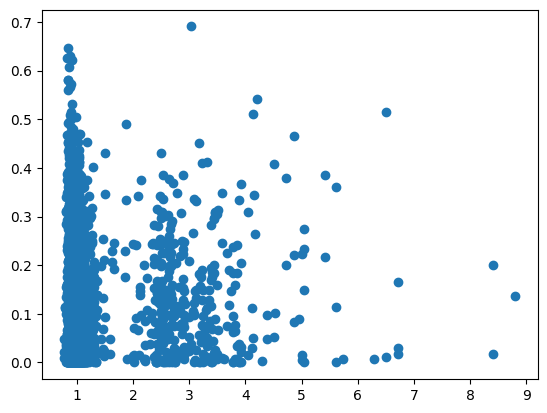

In [248]:
df["mean_r_pos"] = df["r_pos"].apply(lambda x: np.mean(x))
df["std_r_pos"] = df["r_pos"].apply(lambda x: np.std(x))
plt.scatter((df["r_pos_max"] - df["r_pos_min"])/df["count"], df["r2"]);

In [239]:
df.columns

Index(['r_nuc', 'r_type', 'pairs', 'm_sequence', 'm_token', 'r_loc_pos',
       'slope', 'intercept', 'r2', 'p_val ', 'ks_stat', 'ks_p_val', 'count',
       'r_pos_min', 'r_pos_max', 'r_data_min', 'r_data_max', 'r_data', 'r_pos',
       'mean_r_pos'],
      dtype='object')

KeyError: 'r2_type'

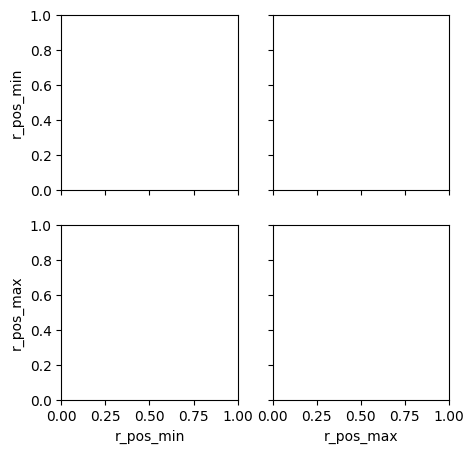

In [240]:
sns.pairplot(df, vars="r_pos_min,r_pos_max".split(","), hue='r2_type');

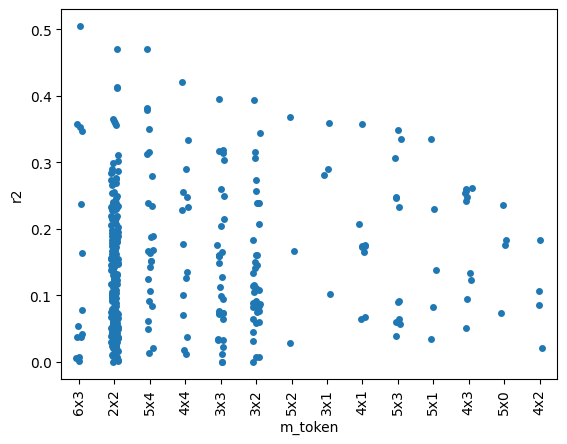

In [ ]:
sns.stripplot(x='m_token', y='r2', data=df_sub, jitter=True);
plt.xticks(rotation=90);

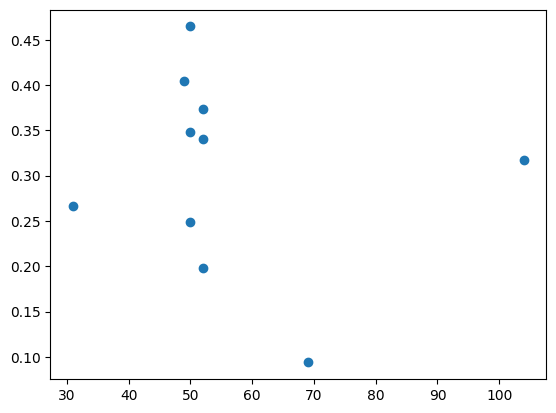

In [ ]:
plt.scatter(df['count'], df['r2']);

In [ ]:
df_sort = df.sort_values('r2', ascending=False)

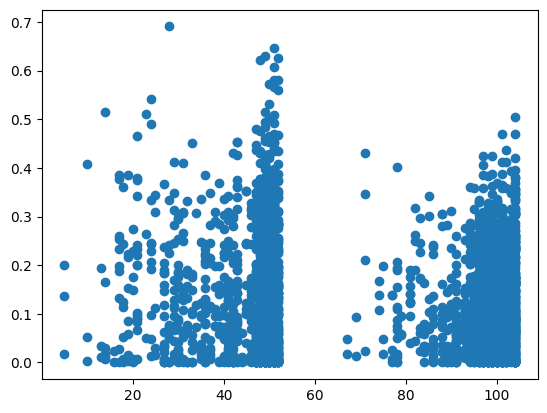

In [ ]:
plt.scatter(df_sort['count'], df_sort['r2']);

In [ ]:
df_sort["pairs"].values[0:10]

array(['', 'AA', 'AA', 'CA', 'AA', 'GA', 'AA', 'CU', 'AA', 'CC'],
      dtype=object)

In [ ]:
def plot_row(row, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(row["r_pos"], row["r_data"]);
    ax.set_title(f"{row['m_sequence']},r_loc_pos={row['r_loc_pos']},r2={round(row['r2'], 2)}");

In [ ]:
df_sub = df.query('count > 100 and r_type == "NON-WC"')
df_sub = df_sub.sort_values('r2', ascending=False)
df.sort_values('r2', ascending=False, inplace=True)

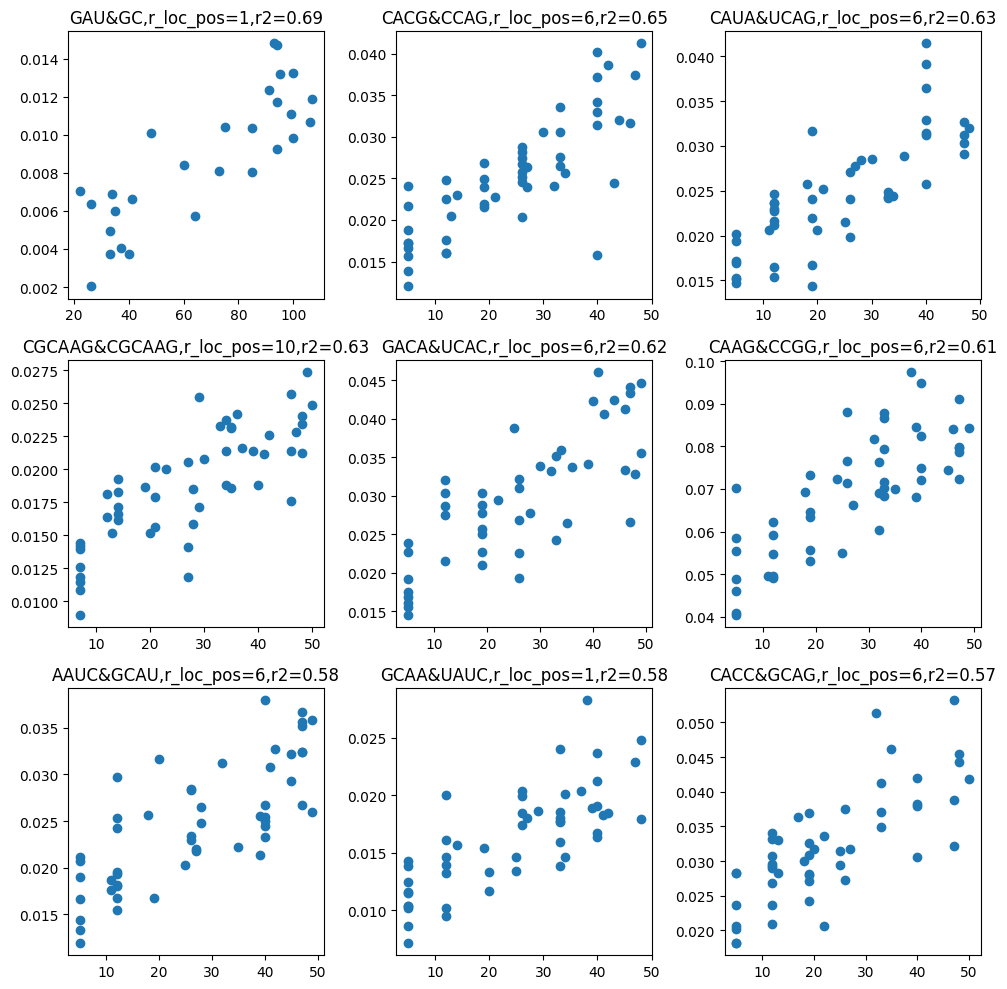

In [ ]:
x, y = 3, 3
fig, axes = plt.subplots(x, y, figsize=(10, 10))
axes = [axes[i][j] for i in range(x) for j in range(y)]
count = 0
for i, row in df[0:9].iterrows():
    plot_row(row, ax=axes[count])
    count += 1
plt.tight_layout()

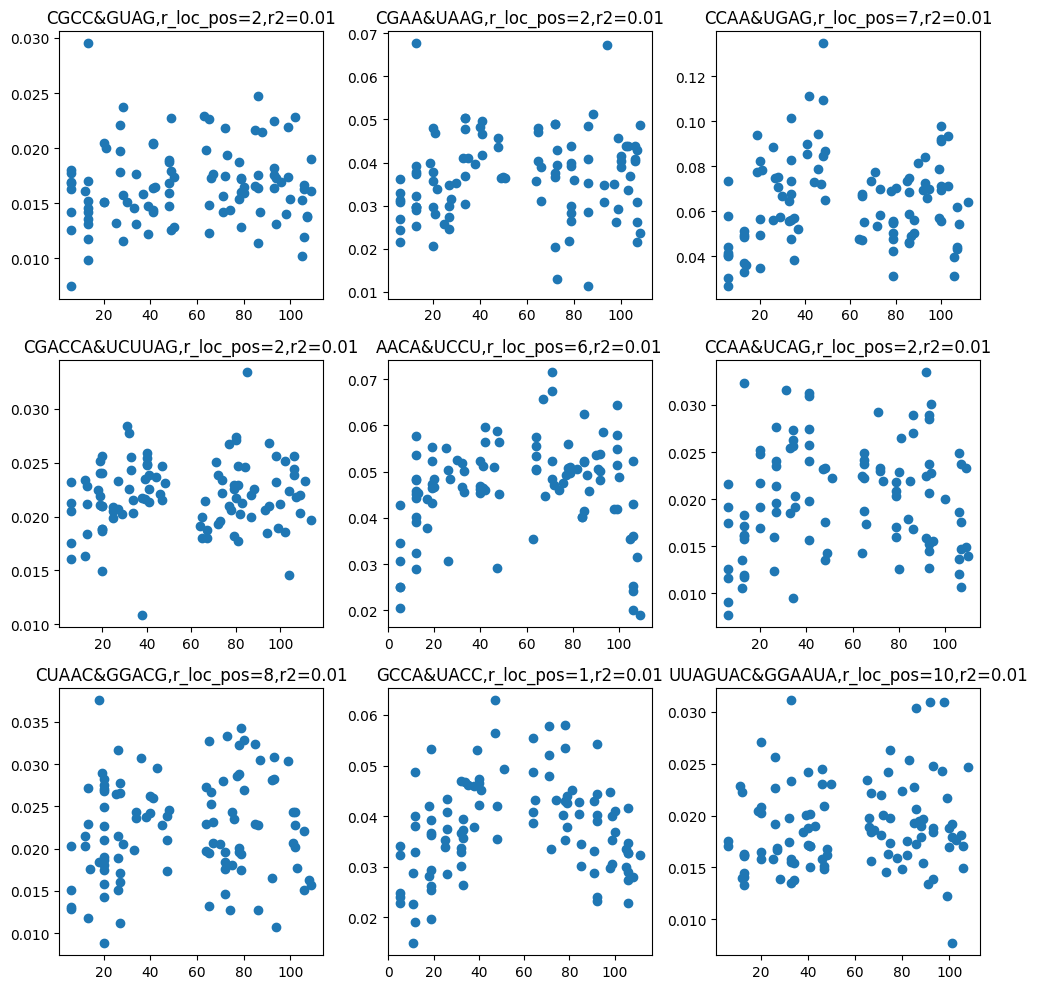

In [ ]:
x, y = 3, 3
fig, axes = plt.subplots(x, y, figsize=(10, 10))
axes = [axes[i][j] for i in range(x) for j in range(y)]
count = 0
for i, row in df_sub[::-1][20:29].iterrows():
    plot_row(row, ax=axes[count])
    count += 1
plt.tight_layout()

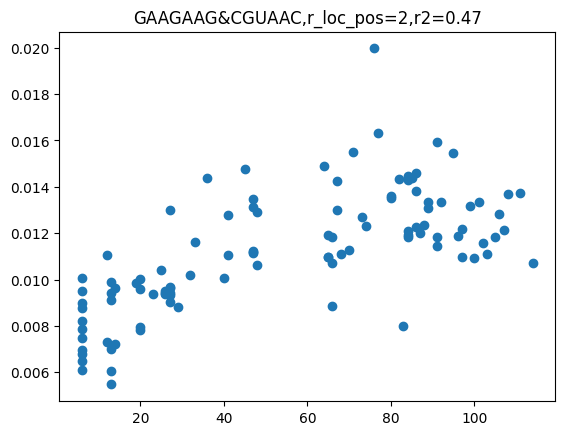

In [ ]:
plot_row(df_sub.iloc[2])

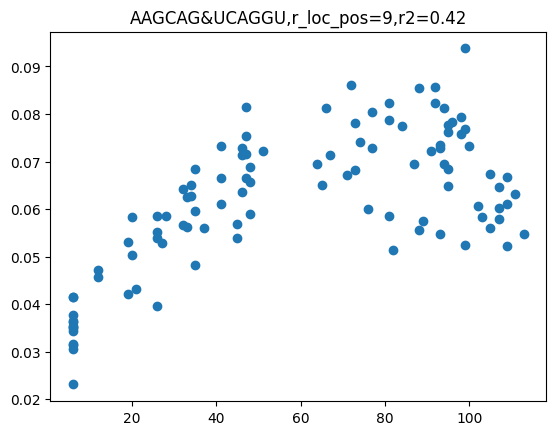

In [ ]:
plot_row(df_sub.iloc[3])